In [1]:
#### OSCILADOR ARMÓNICO AMORTIGUADO FORZADO ####

import numpy as np
import matplotlib.pyplot as plt
from math import *

# Condiciones iniciales

x_0 = 1 # Posición inicial (arb)
v_0 = 0 # Velocidad inicial (arb)

# Definiciones iniciales

k = 10 # Número de veces que cambia la k en el movimiento del oscilador
sep = 100 # Número de puntos registrados en cada oscilación
t = k*sep # Instantes totales de tiempo en los que se registran el movimiento del oscilador
w_0 = 1 # Frecuencia natural x>0
W_0 = 50 # Frecuencia natural x<0
amort = 0.01 # constante de amortiguamiento
f_0 = 1 # Amplitud de la fuerza por unidad de masa
w = 1 # Frecuencia fuerza externa

# Predefinimos las matrices donde guardaremos los resultados

x = np.zeros(t) # posiciones
v = np.zeros(t) # velocidades
T = np.zeros(k) # instantes donde x se hace cero
v_c = np.zeros(k) # velocidades donde x se hace cero

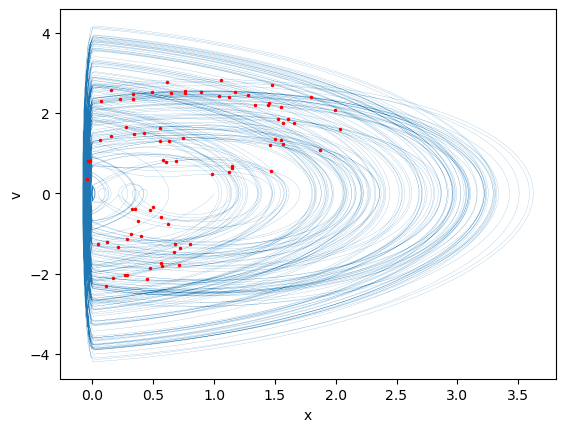

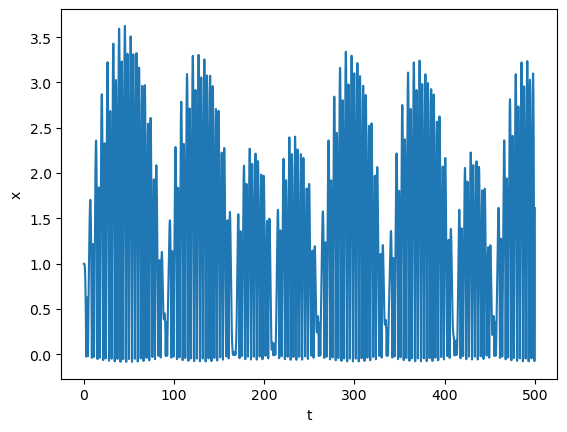

In [2]:
# Resolución numérica de la ecuación diferencial

m = 2 # Número de ecuaciones diferenciales de primer orden que queremos resolver

def EDO1(x,y): # Escribimos todas las EDOs necesarias apra resolver el problema
    return y[1]

def EDO2(x,y): # Usaremos esta ecuación para x>0
    if y[0] >= 0:
        return -2*amort*y[1]-w_0**2*y[0]+f_0*np.cos(w*x)
    else:
        return -2*amort*y[1]-W_0**2*y[0]+f_0*np.cos(w*x)

def RK4(EDO, x0, y0, xf, h):

    # EDO: Array de ecuaciones diferenciales de primer orden
    # x0: valor inicial de la variable independiente
    # y0: valor de la variable dependiente evaluada en x = x0 (condición inicial si x=0)
    # xf: valor final de la variable independiente
    # h: tamaño del paso

    n = int((xf-x0)/h)+1 # Calculamos el número de puntos
    
    x = np.empty(n) # Creamos arrays donde almacenar la solución
    y = np.empty([n,m])
    k1,k2,k3,k4= np.empty(m),np.empty(m),np.empty(m),np.empty(m)

    x[0] = x0 # Aplicamos las condiciones iniciales
    for j in range(m):
        y[0,j] = y0[j]
    
    for i in range(n-1): # Implementamos el método RK4
        x[i] = x0+i*h
        for j in range(m):
            k1[j] = h*EDO[j](x[i],y[i,:])
        for j in range(m):
            k2[j] = h*EDO[j](x[i]+0.5*h,y[i]+0.5*k1)
        for j in range(m):
            k3[j] = h*EDO[j](x[i]+0.5*h,y[i]+0.5*k2)
        for j in range(m):
            k4[j] = h*EDO[j](x[i]+h,y[i]+k3)
        for j in range(m):
            y[i+1,j] = y[i,j]+(1/6)*(k1[j]+2*k2[j]+2*k3[j]+k4[j]);

    x[n-1] = xf
            
    return x,y

def poincare(t,theta,w,h,tf,wf): # Función que obtiene los puntos del diagrama de Poincaré
    
    # t: instantes de tiempo
    # theta: posiciones angulares
    # w: velocidades angulares
    # h: tamaño del paso
    # tf: intervalo de tiempo considerado (se asume que t0 = 0)
    # wf: frecuencia fuerza externa
    
    n = np.size(t) # Número de puntos de los inputs
    T = 2*pi/wf # Periodo de la fuerza externa
    p_ang = [] # Listas donde se almacenan los puntos del diagrama de Poincaré
    p_vel = []
    
    for i in range(n):
        
        if T*(i+1) > tf: # Si nos pasamos del tiempo considerado dejar de representa puntos del diagrama
            break
        
        for j in range(n-1):
            if abs(t[j]-T*(i+1)) < h/2: # Buscamos los instantes de tiempo más cercanos a los que deberían aparecer en el diagrama de Poincaré
                p_ang.append(theta[j]) # Añadimos a las listas los valores de posición angular y velocidad angular correspondientes a los tiempos calculados
                p_vel.append(w[j])
                break # Solo se corresponde un valor de t[i] a cada T*i así que cuando se encuentre paramos de buscar y pasamos al siguiente
            
    arrp_ang = np.array(p_ang) # Convertimos listas en arrays
    arrp_vel = np.array(p_vel)
    
    p = np.empty([2,np.size(arrp_ang)]) # Metemos los dos arrays en uno solo que contenga toda la información para representar el diagrama
    p[0,:] = arrp_ang 
    p[1,:] = arrp_vel

    return p

# Código del problema

EDO = np.array([EDO1,EDO2]) # Array de EDOs del el sistema

h = 0.01 # Paso de tiempo
tf = 5000 # Variables independientes escogidas
t0 = 0

y0 = np.array([x_0,v_0]) # Establecemos las condiciones iniciales

t,y = RK4(EDO,t0,y0,tf,h) # Resolvemos el sistema
p = poincare(t,y[:,0],y[:,1],h,tf-t0,w) # Calculamos los puntos del diagrama de Poincaré

# Representaciones gráficas
            
# plt.plot(x1a[range(40000,50000)],y1a[range(40000,50000),0])
plt.plot(y[:,0],y[:,1],linewidth='0.1')
plt.plot(p[0,:],p[1,:],'.',color='red',markersize='3') 
plt.xlabel('x')
plt.ylabel('v')
plt.title('')
plt.show()

plt.plot(t,y[:,0])
plt.xlabel('t')
plt.ylabel('x')
plt.title('')
plt.show()